In [1]:
### 常规分析包
import os
import time
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import norm, pearsonr, spearmanr
from scipy.spatial import distance
### 绘图包
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.lines as mlines
from matplotlib.font_manager import FontProperties
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42 # 输出PDF文字可编辑
### 其他
import cloudpickle as pickle
import warnings
warnings.filterwarnings("ignore") # 报错提示
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all' #last_expr

In [2]:
meta = pd.read_csv('../Data_preprocess/1.1.MetaData.tsv', sep='\t', index_col=0)
meta.head(2)
#data = pd.read_csv('../Data/16S/MZJ_dada2_table_ASV.tsv', sep='\t', index_col=0, skiprows=1)
data = pd.read_csv('../Data/16S/DADA2_table/MZJ_dada2_table_L6.tsv', sep='\t', index_col=0, skiprows=1)
data.columns = [i if i!='11_10' else 'C11_10' for i in data.columns]

data.shape
data.head(2)

SampleID SampleID_1 Child_ID Sample_type   Day Time MotherID  WMS  \
ID                                                                         
C11_10    11_10       D_10       11           C  25.0  T10    M11_M    0   
C11_11    11_11       D_11       11           C  29.0  T11    M11_M    0   

        Gender Mode of delivery  ...  Day of the last sample  \
ID                               ...                           
C11_10  Female        C-section  ...                   352.0   
C11_11  Female        C-section  ...                   352.0   

        Number of samples  Day of introducing solid food  \
ID                                                         
C11_10               25.0                          176.0   
C11_11               25.0                          176.0   

        Day of breastfeeding cessation  Solid food  Breastfeeding  \
ID                                                                  
C11_10                           356.0         0.0            1.0   
C11_11                           356.0         0.0            1.0   

        Feeding mode(BFD:0,MFD:1)  Sibling(Y:1,N:0)  PAE(Y:1,N:0)  \
ID                                                                  
C11_10                        0.0               0.0           0.0   
C11_11                        0.0               0.0           0.0   

        Allergy(Y:1,N:0)  
ID                        
C11_10               1.0  
C11_11               1.0  

[2 rows x 21 columns]

(511, 466)

C11_10  C1_11  C1_12  \
#OTU ID                                                                     
k__Bacteria;p__Proteobacteria;c__Gammaproteobac...  10611.0  247.0  699.0   
k__Bacteria;p__Firmicutes;c__Clostridia;o__Clos...      0.0    0.0    0.0   

                                                     C1_13  C1_14  C1_15  \
#OTU ID                                                                    
k__Bacteria;p__Proteobacteria;c__Gammaproteobac...  1819.0  421.0  194.0   
k__Bacteria;p__Firmicutes;c__Clostridia;o__Clos...     0.0    0.0    0.0   

                                                     C1_16    C1_2   C1_21  \
#OTU ID                                                                      
k__Bacteria;p__Proteobacteria;c__Gammaproteobac...  2550.0  9995.0  7853.0   
k__Bacteria;p__Firmicutes;c__Clostridia;o__Clos...     0.0     0.0     0.0   

                                                     C1_22  ...  M21_M  M25_M  \
#OTU ID                                                     ...                 
k__Bacteria;p__Proteobacteria;c__Gammaproteobac...  1220.0  ...    0.0    0.0   
k__Bacteria;p__Firmicutes;c__Clostridia;o__Clos...     0.0  ...    0.0    0.0   

                                                    M26_M  M28_M  M29_M  \
#OTU ID                                                                   
k__Bacteria;p__Proteobacteria;c__Gammaproteobac...    0.0    0.0    0.0   
k__Bacteria;p__Firmicutes;c__Clostridia;o__Clos...    0.0    0.0    0.0   

                                                    M31_M   M32_M  M34_M  \
#OTU ID                                                                    
k__Bacteria;p__Proteobacteria;c__Gammaproteobac...   23.0  4733.0   16.0   
k__Bacteria;p__Firmicutes;c__Clostridia;o__Clos...    0.0     0.0    0.0   

                                                    M35_M  M4_M  
#OTU ID                                                          
k__Bacteria;p__Proteobacteria;c__Gammaproteobac...  116.0  99.0  
k__Bacteria;p__Firmicutes;c__Clostridia;o__Clos...    0.0   0.0  

[2 rows x 466 columns]

In [3]:
taxonomy = pd.read_csv('../Data/16S/MZJ_dada2_taxonomy_GG.tsv', sep='\t', index_col=0)
taxonomy.head(2)

Taxon  \
Feature ID                                                                            
3303dcf065483fbf1a02ff00a59b7848  k__Bacteria; p__Proteobacteria; c__Gammaproteo...   
44c9f59231dd703269388032da1d5a98  k__Bacteria; p__Proteobacteria; c__Gammaproteo...   

                                  Confidence  
Feature ID                                    
3303dcf065483fbf1a02ff00a59b7848         1.0  
44c9f59231dd703269388032da1d5a98         1.0

In [4]:
### rpy2
import rpy2.robjects as ro
from rpy2.robjects import r, pandas2ri
from rpy2.robjects.packages import importr
from rpy2.robjects.pandas2ri import py2rpy, rpy2py
pandas2ri.activate()

In [5]:
# 1. 导入包
importr('spaa')

rpy2.robjects.packages.Package as a <module 'spaa'>

In [6]:
Times = ['M', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T10', 'T11', 'T12', 'T13', 'T14', 'T15', 
         'T16', 'T17', 'T18', 'T19', 'T20', 'T21', 'T22', 'T23', 'T24', 'T25', 'T26', 'T27']
result = pd.DataFrame(index=Times, columns=data.index)
for t in Times:
    samples = meta.loc[meta['Time']==t, :].index
    _ = r.assign('data', data.loc[:, samples].T)
    width = r("niche_width <- niche.width(data, method = 'levins')")
    result.loc[t, data.index] = width.loc['1', data.index]

In [8]:
result.head(2)
result.to_csv('../Results_0609/5.2. Genus生态位宽度.csv')

#OTU ID k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacteriales;f__Enterobacteriaceae;__  \
M                                                 1.763518                                                   
T1                                                1.953757                                                   

#OTU ID k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Peptostreptococcaceae;__  \
M                                                      inf                                     
T1                                                     inf                                     

#OTU ID k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Clostridiaceae;g__Clostridium  \
M                                                 4.223743                                          
T1                                                1.942634                                          

#OTU ID k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides  \
M                                                  8.01914                                              
T1                                                1.464835                                              

#OTU ID k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Bifidobacteriales;f__Bifidobacteriaceae;g__Bifidobacterium  \
M                                                 5.456363                                                              
T1                                                1.252512                                                              

#OTU ID k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus  \
M                                                 6.391652                                             
T1                                                1.781218                                             

#OTU ID k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Veillonellaceae;g__Veillonella  \
M                                                 1.238937                                           
T1                                                     1.0                                           

#OTU ID k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Enterococcaceae;g__Enterococcus  \
M                                                 1.760168                                           
T1                                                1.870052                                           

#OTU ID k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__[Ruminococcus]  \
M                                                 6.158574                                              
T1                                                1.955841                                              

#OTU ID k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Lactobacillus  \
M                                                 1.740146                                             
T1                                                1.988832                                             

#OTU ID  ... k__Bacteria;p__Chloroflexi;c__Anaerolineae;o__SBR1031;__;__  \
M        ...                                                inf            
T1       ...                                                1.0            

#OTU ID k__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhodobacterales;f__Hyphomonadaceae;g__Hyphomonas  \
M                                                      inf                                                         
T1                                                     inf                                                         

#OTU ID k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Peptococcaceae;g__Niigata-25  \
M                                                      inf                                         
T1                                                     inf    

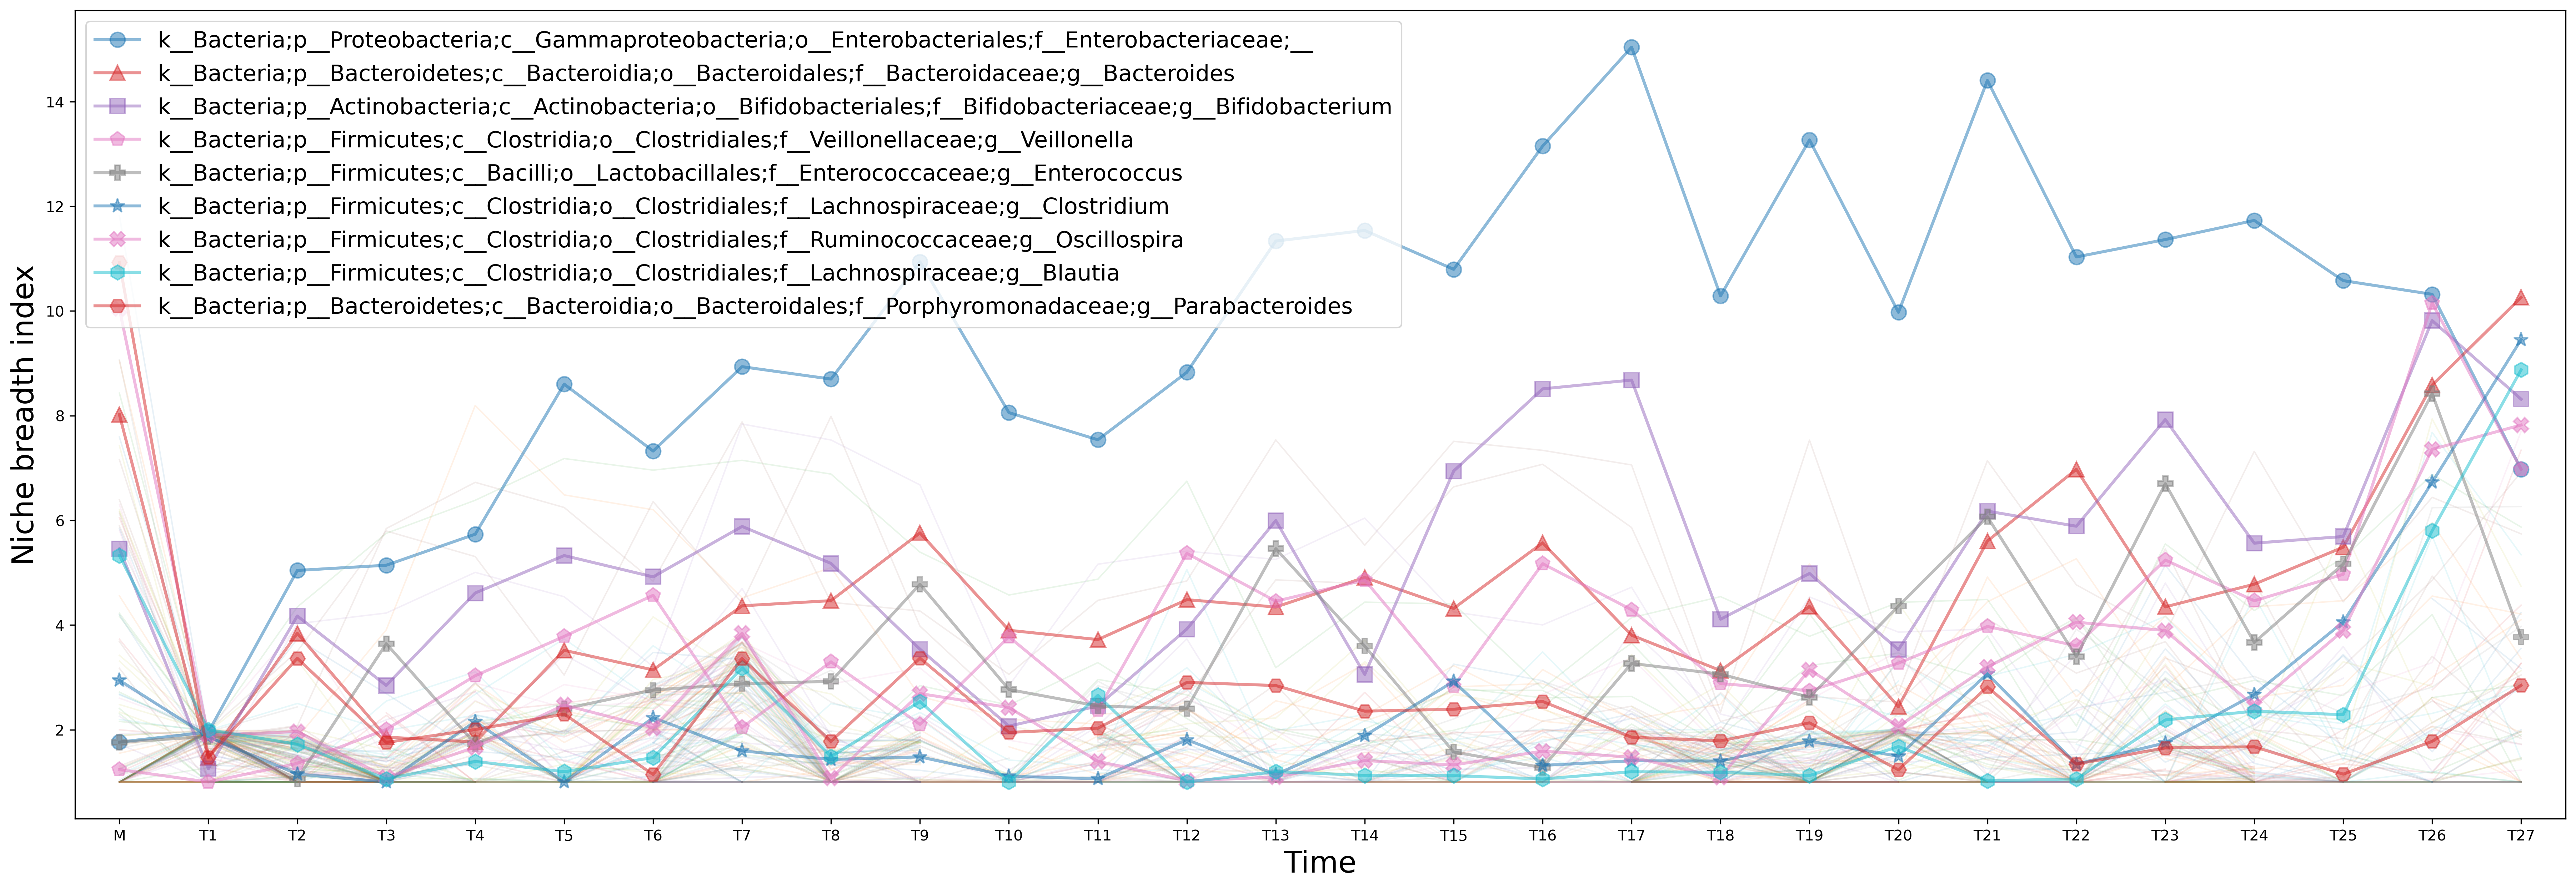

In [12]:
from scipy.interpolate import make_interp_spline

result = pd.read_csv('../Results_0609/5.2. Genus生态位宽度.csv', index_col=0)
Times = ['M', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T10', 'T11', 'T12', 'T13', 'T14', 'T15', 
         'T16', 'T17', 'T18', 'T19', 'T20', 'T21', 'T22', 'T23', 'T24', 'T25', 'T26', 'T27']

fig = plt.figure(figsize=(30, 10), dpi=300)
ax = plt.subplot(1,1,1)
makers = ['o', '^', 's', 'p', 'P', '*', 'X', 'h', 'H']
k = 0
for i in result.columns:
    time = np.array(range(result.shape[0]))
    values = result[i].values
    check = [not np.isinf(j) for j in values]
    values_del = values[check]
    #_ = plt.plot(time, values, alpha=0.1, lw=0.5, zorder=0)
    if values_del.max()>=8 and sum(check)>27:
        #xnew = np.linspace(time.min(), time.max(), 300)
        #power_smooth = make_interp_spline(time, values)(xnew)
        #_ = plt.plot(xnew, power_smooth, alpha=0.3, lw=2, zorder=1)
        _ = plt.plot(time, values, alpha=0.5, lw=2, zorder=1, marker=makers[k], label=i, ms=10)
        #_ = plt.plot(time, values, alpha=0.3, lw=2, zorder=1, marker='o', label=taxonomy.loc[i, 'Taxon'])
        k += 1
    else:
        _ = plt.plot(time, values, alpha=0.1, lw=1, zorder=0)

_ = plt.xticks(range(result.shape[0]), Times)
_ = plt.xlim([-0.5, 27.5])
_ = plt.legend(fontsize=15)
_ = plt.xlabel('Time', fontsize=20)
_ = plt.ylabel('Niche breadth index', fontsize=20)
fig.savefig('../Results_0609/5.2. 生态位宽度_genus.pdf', dpi=300)

# Microbial Interaction Network (Genus)

In [5]:
data = pd.read_csv('../Data/16S/DADA2_table/MZJ_dada2_table_L6.tsv', sep='\t', index_col=0, skiprows=1)
data.columns = [i if i!='11_10' else 'C11_10' for i in data.columns]

In [6]:
data.shape
data.head(2)

(511, 466)

C11_10  C1_11  C1_12  \
#OTU ID                                                                     
k__Bacteria;p__Proteobacteria;c__Gammaproteobac...  10611.0  247.0  699.0   
k__Bacteria;p__Firmicutes;c__Clostridia;o__Clos...      0.0    0.0    0.0   

                                                     C1_13  C1_14  C1_15  \
#OTU ID                                                                    
k__Bacteria;p__Proteobacteria;c__Gammaproteobac...  1819.0  421.0  194.0   
k__Bacteria;p__Firmicutes;c__Clostridia;o__Clos...     0.0    0.0    0.0   

                                                     C1_16    C1_2   C1_21  \
#OTU ID                                                                      
k__Bacteria;p__Proteobacteria;c__Gammaproteobac...  2550.0  9995.0  7853.0   
k__Bacteria;p__Firmicutes;c__Clostridia;o__Clos...     0.0     0.0     0.0   

                                                     C1_22  ...  M21_M  M25_M  \
#OTU ID                                                     ...                 
k__Bacteria;p__Proteobacteria;c__Gammaproteobac...  1220.0  ...    0.0    0.0   
k__Bacteria;p__Firmicutes;c__Clostridia;o__Clos...     0.0  ...    0.0    0.0   

                                                    M26_M  M28_M  M29_M  \
#OTU ID                                                                   
k__Bacteria;p__Proteobacteria;c__Gammaproteobac...    0.0    0.0    0.0   
k__Bacteria;p__Firmicutes;c__Clostridia;o__Clos...    0.0    0.0    0.0   

                                                    M31_M   M32_M  M34_M  \
#OTU ID                                                                    
k__Bacteria;p__Proteobacteria;c__Gammaproteobac...   23.0  4733.0   16.0   
k__Bacteria;p__Firmicutes;c__Clostridia;o__Clos...    0.0     0.0    0.0   

                                                    M35_M  M4_M  
#OTU ID                                                          
k__Bacteria;p__Proteobacteria;c__Gammaproteobac...  116.0  99.0  
k__Bacteria;p__Firmicutes;c__Clostridia;o__Clos...    0.0   0.0  

[2 rows x 466 columns]

In [7]:
### rpy2
import rpy2.robjects as ro
from rpy2.robjects import r, pandas2ri
from rpy2.robjects.packages import importr
from rpy2.robjects.pandas2ri import py2rpy, rpy2py
pandas2ri.activate()
importr('SpiecEasi')

rpy2.robjects.packages.Package as a <module 'SpiecEasi'>

In [14]:
child_samples = [i for i in data.columns if i[0]=='C']
temp = data.loc[:, child_samples]
genus = (temp>0).mean(1)>0.01
temp = temp.loc[genus, :]
temp.shape

(222, 450)

In [17]:
temp.head(2)

C11_10  C1_11  C1_12  \
#OTU ID                                                                     
k__Bacteria;p__Proteobacteria;c__Gammaproteobac...  10611.0  247.0  699.0   
k__Bacteria;p__Firmicutes;c__Clostridia;o__Clos...      0.0    0.0    0.0   

                                                     C1_13  C1_14  C1_15  \
#OTU ID                                                                    
k__Bacteria;p__Proteobacteria;c__Gammaproteobac...  1819.0  421.0  194.0   
k__Bacteria;p__Firmicutes;c__Clostridia;o__Clos...     0.0    0.0    0.0   

                                                     C1_16    C1_2   C1_21  \
#OTU ID                                                                      
k__Bacteria;p__Proteobacteria;c__Gammaproteobac...  2550.0  9995.0  7853.0   
k__Bacteria;p__Firmicutes;c__Clostridia;o__Clos...     0.0     0.0     0.0   

                                                     C1_22  ...   C5_25  \
#OTU ID                                                     ...           
k__Bacteria;p__Proteobacteria;c__Gammaproteobac...  1220.0  ...  1994.0   
k__Bacteria;p__Firmicutes;c__Clostridia;o__Clos...     0.0  ...     0.0   

                                                     C5_26  C5_27    C5_3  \
#OTU ID                                                                     
k__Bacteria;p__Proteobacteria;c__Gammaproteobac...  3082.0  274.0  8741.0   
k__Bacteria;p__Firmicutes;c__Clostridia;o__Clos...   176.0   89.0    75.0   

                                                      C5_4    C5_5    C5_6  \
#OTU ID                                                                      
k__Bacteria;p__Proteobacteria;c__Gammaproteobac...  2067.0  2392.0  1522.0   
k__Bacteria;p__Firmicutes;c__Clostridia;o__Clos...     0.0    85.0    27.0   

                                                      C5_7     C5_8     C5_9  
#OTU ID                                                                       
k__Bacteria;p__Proteobacteria;c__Gammaproteobac...  9491.0  11659.0  10835.0  
k__Bacteria;p__Firmicutes;c__Clostridia;o__Clos...     0.0     74.0     23.0  

[2 rows x 450 columns]

In [ ]:
_ = r.assign('data', temp.T)
result = r('''
            bootres <- SpiecEasi::sparccboot(data, ncpus = 3, R = 1000)
            cor_result <- SpiecEasi::pval.sparccboot(bootres)
            # reshape the results
            use_names <- colnames(bootres$data)
            com_res <- t(combn(use_names, 2))
            res <- cbind.data.frame(com_res, cor_result$cors, cor_result$pvals, stringsAsFactors = FALSE)
            colnames(res) <- c("t1", "t2", "cor", "p")
            res
            ''')

In [ ]:
result